In [23]:
# Imports
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier


# Modeling

Now that we have the preprocessed data, we can train the model.

**Objective**: To train and compare different models in order to predict whether a customer will churn.

In [15]:
# Load data

X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")
y_train = y_train.squeeze()

In [16]:
# We are going to start with a simple model: DummyClassifier
# A dummy classifier is a simple machine learning model that makes predictions using basic rules, without actually learning from the input data. It serves as a baseline for comparing the performance of more complex models. The dummy classifier helps us understand if our sophisticated models are actually learning useful patterns or just guessing.

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)

dummy_report = classification_report(y_test, y_pred, zero_division=0)

print(f"Dummy Classifier report: {dummy_report}")

Dummy Classifier report:               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



This model always predicts the most frequent class, which is 0 in this case. As a result, it achieves a precision of 80%, reflecting the class distribution of 80% for class 0 and 20% for class 1, as observed in the previous notebook.

This serves as a useful baseline to compare more sophisticated models against and evaluate whether they actually learn meaningful patterns from the data.

In [17]:
# The next is a lineal model: Logistic Regression
# Logistic regression is a statistical method used for predicting binary outcomes. Despite its name, it’s used for classification rather than regression. It estimates the probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, the model predicts that the instance belongs to that class (or vice versa).

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

y_pred = lr_clf.predict(X_test)
lr_report = classification_report(y_test, y_pred)
print(f"Logistic Regression report: {lr_report}")

Logistic Regression report:               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [18]:
lr_clf = LogisticRegression(class_weight= "balanced")
lr_clf.fit(X_train, y_train)

y_pred = lr_clf.predict(X_test)
lr_report_bal = classification_report(y_test, y_pred)
print(f"Logistic Regression report: {lr_report_bal}")

Logistic Regression report:               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.74      2000



By applying *class_weight='balanced'* in Logistic Regression, the model significantly improved its ability to detect churn cases, increasing recall from 19% to 71%. Although the overall accuracy dropped from 81% to 72%, the model now balances performance across both classes, achieving an F1-score of 0.50 for the churn class (compared to 0.29 before). This trade-off is acceptable given the importance of identifying customers at risk of churning. It highlights the limitations of accuracy as a metric in imbalanced datasets and shows that adjusting for class imbalance is a crucial step in improving model effectiveness.

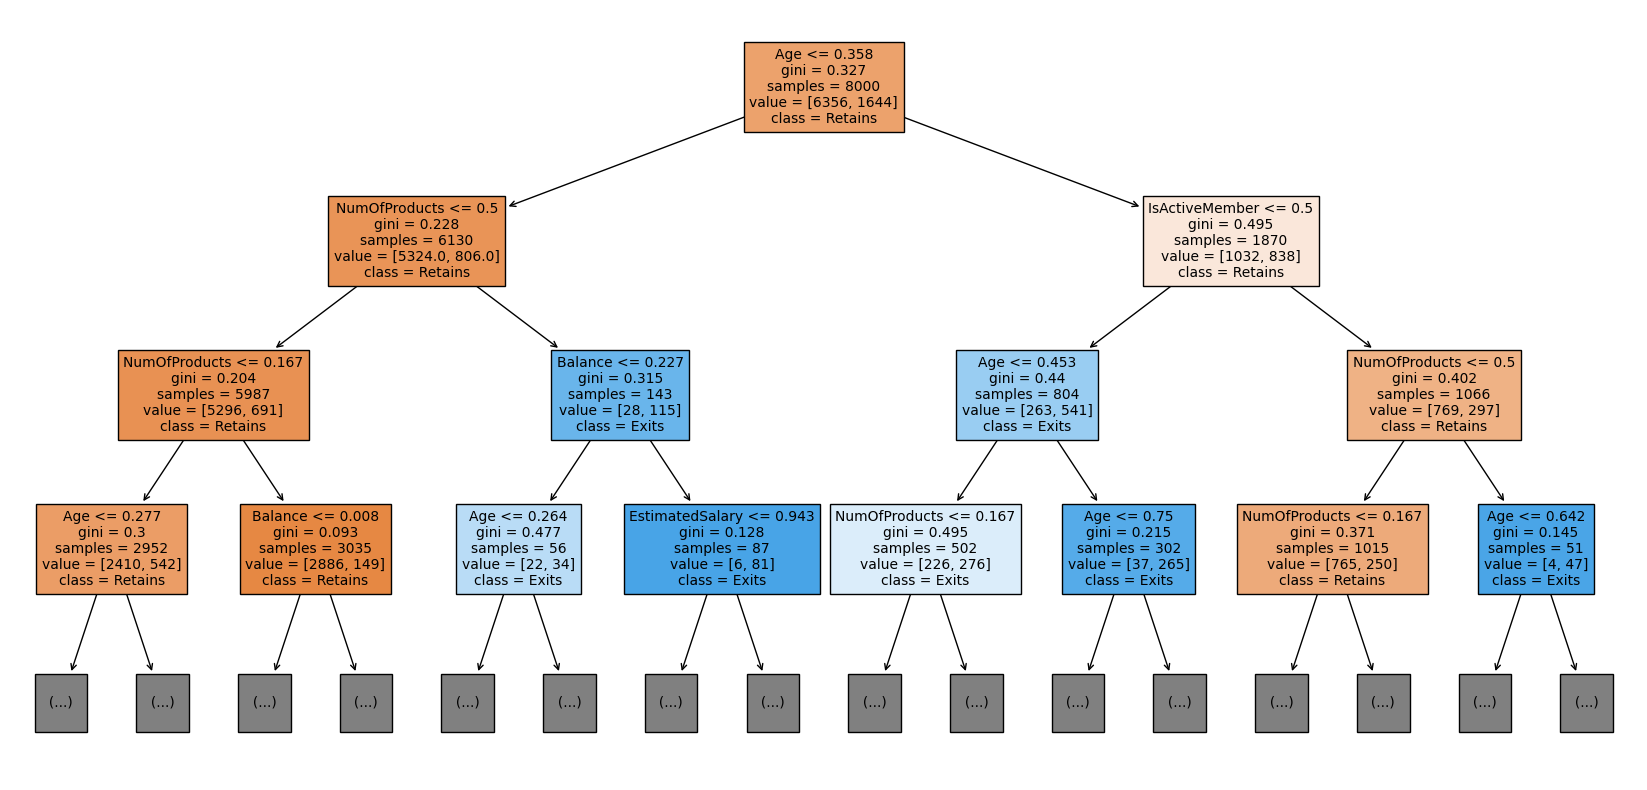

In [19]:
# Next, we move on to tree-based models: Decision Trees and Random Forest.

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

#Plot Tree
plt.figure(figsize=(21,10))
plot_tree(dt_clf, filled=True, feature_names=X_train.columns, max_depth=3,
          fontsize=10, class_names=['Retains', 'Exits']);

In [20]:
y_pred = dt_clf.predict(X_test)

dt_report = classification_report(y_test, y_pred)
print(f"Decision Trees report: {dt_report}")

Decision Trees report:               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1607
           1       0.44      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.66      2000
weighted avg       0.79      0.78      0.78      2000



In [21]:
dt_clf = DecisionTreeClassifier(class_weight= "balanced")

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

dt_report_bal = classification_report(y_test, y_pred)
print(f"Decision Trees report: {dt_report_bal}")

Decision Trees report:               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1607
           1       0.51      0.50      0.51       393

    accuracy                           0.81      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.81      0.81      0.81      2000



Using class_weight='balanced' improves the model’s overall accuracy and helps balance performance between the majority and minority classes. While precision and recall for the majority class increase slightly, the minority class sees a modest gain in precision but a small drop in recall. This indicates the model becomes somewhat better at detecting churners, though recall remains limited.

In [25]:
# Random Forest

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
rf_report = classification_report(y_test, y_pred)
print(f"Random Forest report: {rf_report}")


Random Forest report:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [26]:
rf_clf = RandomForestClassifier(class_weight = "balanced")
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
rf_report_bal = classification_report(y_test, y_pred)
print(f"Random Forest report: {rf_report_bal}")

Random Forest report:               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



The Random Forest model with class weight balancing achieves high accuracy (86-87%) and strong precision and recall for the majority class (0). For the minority class (1), precision improves to around 0.75-0.77, though recall remains moderate (~0.46-0.47). This results in a balanced F1-score near 0.57-0.58 for churners. Overall, the model performs well but still struggles somewhat to fully capture the minority class, suggesting that further tuning or complementary techniques could enhance detection of churn cases.